<a href="https://www.kaggle.com/code/maimunulkjisan/spam-mail-prediction-using-machine-learning?scriptVersionId=199351234" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Spam Mail Prediction Using Machine Learning**

In the fast-paced world of digital communication, the battle against unsolicited SMS messages has found a powerful ally in the form of Machine Learning. This cutting-edge technology has transformed the way we combat SMS spam, offering a shield of protection to individuals and businesses alike.

In the heart of this innovation lies a dedicated team of data wizards, working tirelessly to create a safer and more efficient messaging environment. They are the unsung heroes in the ongoing quest to thwart SMS spam and its many malicious faces.

With their state-of-the-art tools and unwavering commitment, these data virtuosos have unleashed the power of Machine Learning to classify and detect SMS spam. Their algorithms are finely tuned to sift through the digital noise, identifying unwanted promotions, phishing scams, malware threats, and more. Each line of code they craft is a step closer to creating a secure digital realm where spam is but a distant memory.

As these data experts collaborate closely with organizations, they become the guardians of digital inboxes. They screen incoming messages with precision, blocking spoofed numbers and thwarting malicious SMS campaigns. With their AI-powered SMS spam classification techniques, they empower businesses and individuals to navigate the digital landscape without the constant fear of falling prey to unsolicited messages.

Through their diligent efforts, these data heroes are rewriting the narrative of digital security. Their work often goes unnoticed, yet its impact is profound. They are the ones who ensure that your inbox is a safe space, where communication is efficient, secure, and void of unwanted distractions.

In the realm of SMS spam classification, they are the silent protectors, the ones who make the digital world a safer place. Their commitment to harnessing the power of Machine Learning in the fight against SMS spam is nothing short of extraordinary, creating a shield against unwanted intrusions and ensuring that every message received is one worth reading.

# Module 1 : Unveiling the Data

In [1]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset ----
df = pd.read_csv('/kaggle/input/spam-mail-prediction-dataset/Mail_Data.csv')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# --- WRITE YOUR CODE FOR TASK 2 ---
null_values = df.isnull().sum()
null_values

#--- Inspect data ---

Category    0
Message     0
dtype: int64

In [3]:
df = df.rename(columns={'Category': 'target', 'Message': 'text'})
df


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
duplicates = df.duplicated().sum()
duplicates

415

In [6]:
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Module 2 : Visualisation

> **Task 1: Visualizing the Spam Landscape**

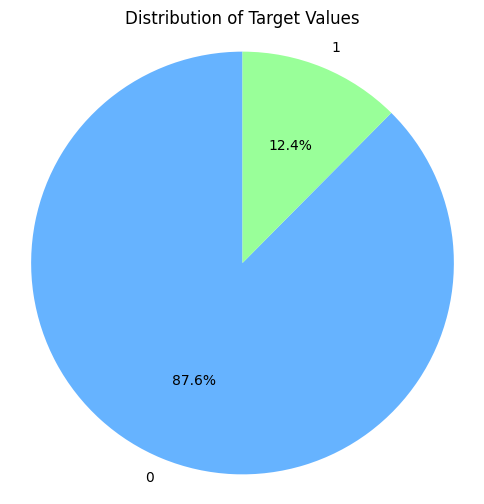

In [7]:
import matplotlib.pyplot as plt
value = df['target'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value, labels=value.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Target Values')
plt.axis('equal')  
plt.show()


> **Task 2: Unveiling Message Length Insights.**

/tmp/ipykernel_17/3775437509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


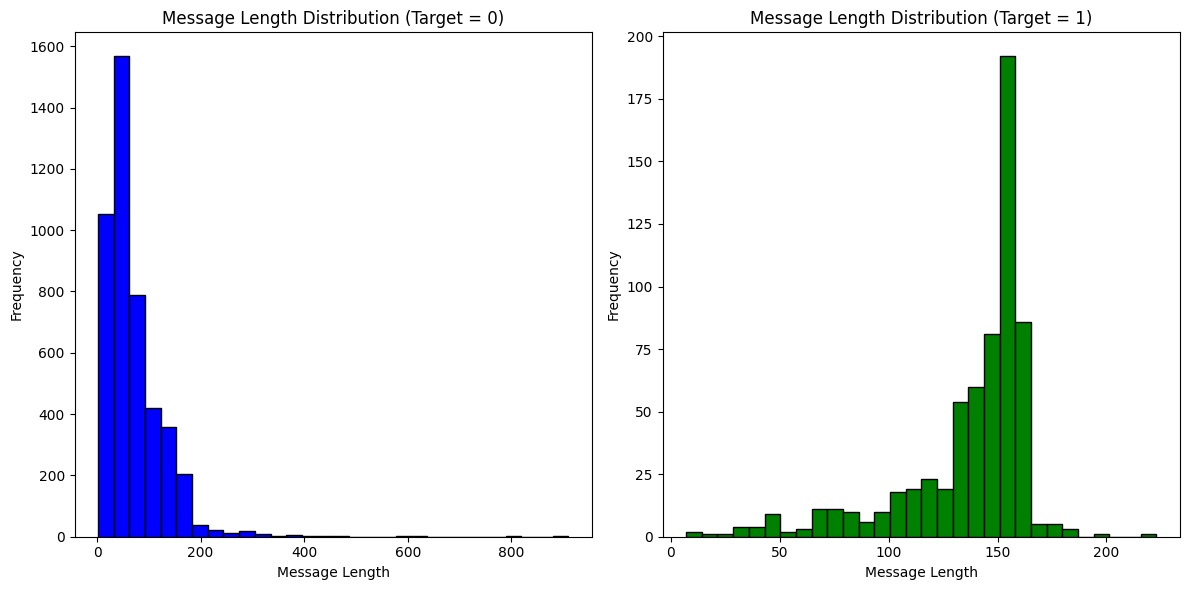

In [8]:
import matplotlib.pyplot as plt

df['num_char'] = df['text'].apply(len)

class_0 = df[df['target'] == 0]['num_char']
class_1 = df[df['target'] == 1]['num_char']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(class_0, bins=30, color='blue', edgecolor='black')
plt.title('Message Length Distribution (Target = 0)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(class_1, bins=30, color='green', edgecolor='black')
plt.title('Message Length Distribution (Target = 1)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


> Task 3: Exploring Message Word Counts.

In [10]:
# Uncommented the below code and run once. After the code is excecuted, please commented the below code
# import nltk
# nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

nltk.download('punkt')



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/tmp/ipykernel_17/547736658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))


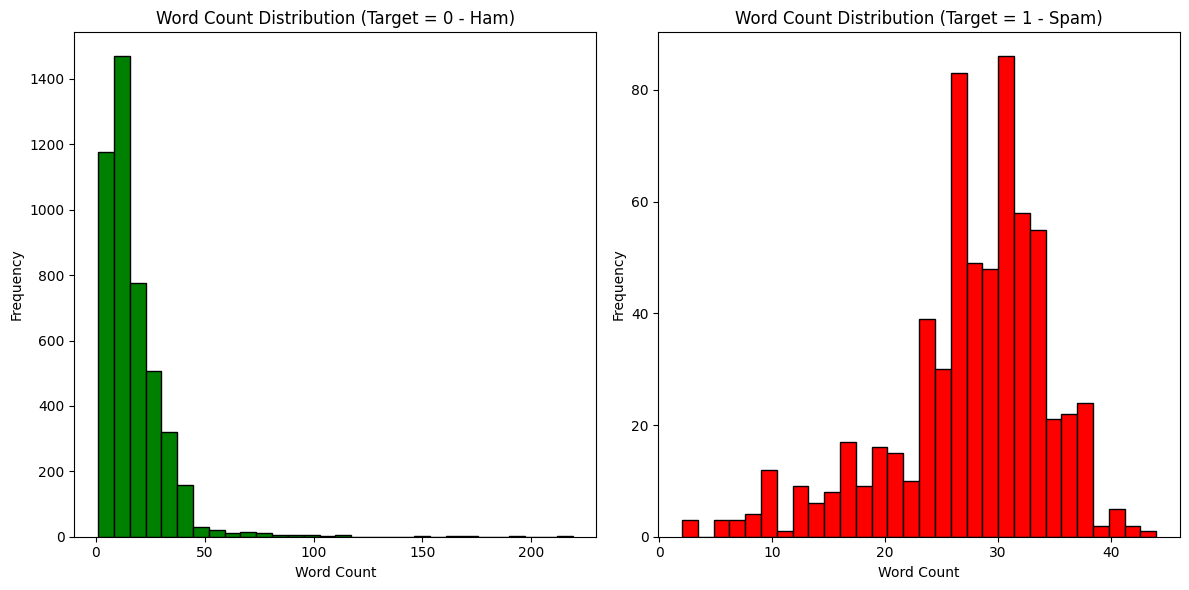

In [11]:
#--- WRITE YOUR CODE FOR TASK 3 ---
#df = ...
# Create a new column 'num_words' to count the number of words in each text entry
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

# Separate the data based on the target classes (0 and 1)
ham_messages = df[df['target'] == 0]['num_words']
spam_messages = df[df['target'] == 1]['num_words']

# Generate histograms for both target classes
plt.figure(figsize=(12, 6))

# Green histogram for ham messages (target = 0)
plt.subplot(1, 2, 1)
plt.hist(ham_messages, bins=30, color='green', edgecolor='black')
plt.title('Word Count Distribution (Target = 0 - Ham)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Red histogram for spam messages (target = 1)
plt.subplot(1, 2, 2)
plt.hist(spam_messages, bins=30, color='red', edgecolor='black')
plt.title('Word Count Distribution (Target = 1 - Spam)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()




In [12]:
df

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will ü b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


> Task 4: Unveiling Sentence Counts' Influence.

/tmp/ipykernel_17/2526124233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


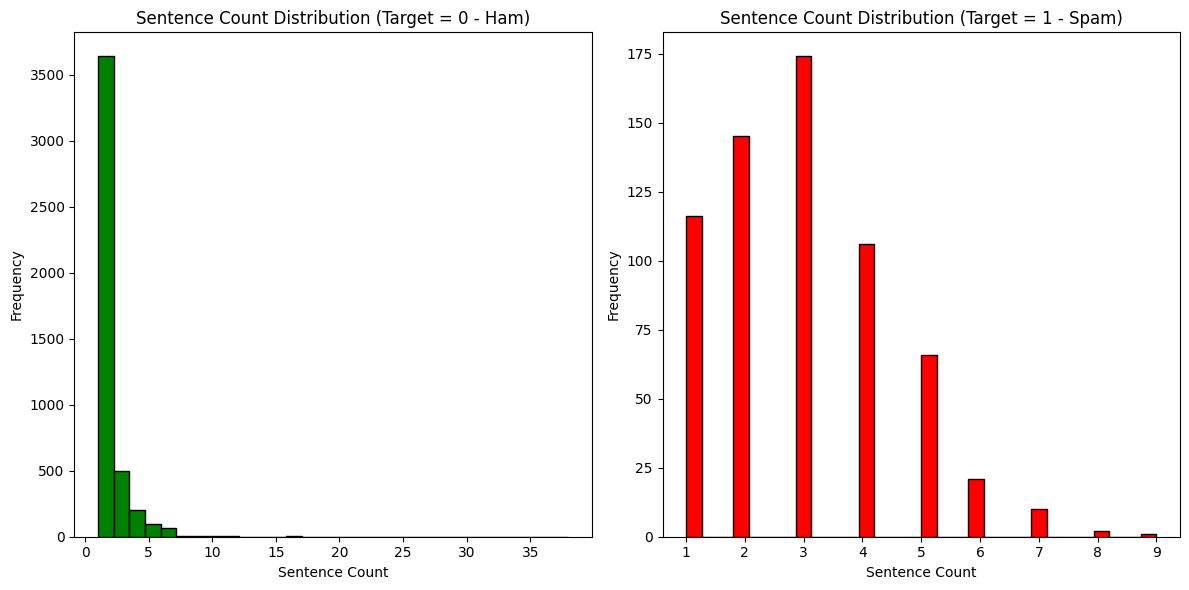

In [13]:
#--- WRITE YOUR CODE FOR TASK 4 ---
#df = ...
from nltk.tokenize import sent_tokenize
df['num_sent'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


ham_messages = df[df['target'] == 0]['num_sent']
spam_messages = df[df['target'] == 1]['num_sent']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ham_messages, bins=30, color='green', edgecolor='black')
plt.title('Sentence Count Distribution (Target = 0 - Ham)')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Red histogram for spam messages (target = 1)
plt.subplot(1, 2, 2)
plt.hist(spam_messages, bins=30, color='red', edgecolor='black')
plt.title('Sentence Count Distribution (Target = 1 - Spam)')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()
#--- Inspect data ---

# plt.figure(figsize = (12, 6))
# plt.hist(df[df['target'] == 0]['num_sent'], color='green', alpha=0.5, label='Ham', bins=30)
# plt.hist(df[df['target'] == 1]['num_sent'], color='red', alpha=0.5, label='Spam', bins=30)
# plt.show()


In [14]:
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


> Task 5: Unraveling Data Relationships.

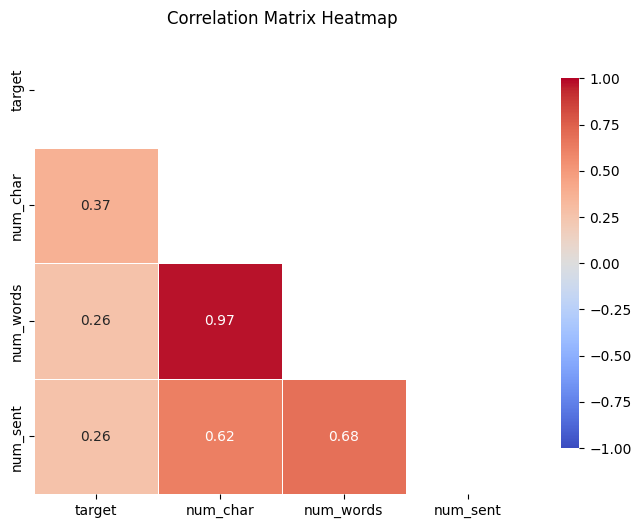

In [15]:
# import seaborn as sns
# num_col = ['target', 'num_char', 'num_words', 'num_sent']

#--- WRITE YOUR CODE FOR TASK 5 ---
#cor = ...
import numpy as np
import seaborn as sns
correlation_columns = ['target', 'num_char', 'num_words', 'num_sent']

# Calculate the correlation matrix and round to two decimal places
cor = df[correlation_columns].corr().round(2)

# Generate a mask for the upper triangle (to avoid redundancy in the heatmap)
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap with annotations, mask, and a defined color palette
sns.heatmap(cor, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': 0.8}, linewidths=0.5)

# Set title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()
#--- Inspect data ---

# plt.subplots(figsize=(12, 10))
# mask = np.triu(np.ones_like(cor, dtype=bool))
# cmap = sns.diverging_palette(200, 20, as_cmap=True)
# sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
# plt.show()


# Module 3

> Task 1: Enhancing Text Data for Machine Learning.

In [16]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import pandas as pd

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def text_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Filter out non-alphanumeric words and stop words
    y = [i for i in text if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation]
    
    # Perform stemming
    y = [ps.stem(i) for i in y]

    # Return the processed text as a single string
    return ' '.join(y)

# Assuming df is already defined as your DataFrame
# Create a new column 'transformed_text' by applying the text_preprocessing function
df['transformed_text'] = df['text'].apply(text_preprocessing)

# Inspect the updated DataFrame
df[['text', 'transformed_text']].head()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipykernel_17/13034611.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(text_preprocessing)


,text,transformed_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [17]:
df

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


> Task 2: Visualizing Non-Spam Messages.

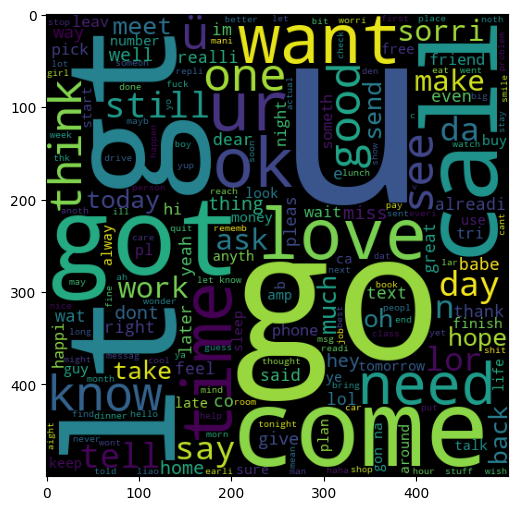

In [18]:
# from wordcloud import WordCloud

#--- WRITE YOUR CODE FOR TASK 2 ---
#ham = ...
from wordcloud import WordCloud


ham = df[df['target'] == 0]
ham_text = ' '.join(ham['transformed_text'])



#--- Inspect data ---

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
ham_wc = wc.generate(ham['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(ham_wc)
plt.show()


> Task 3: Visualizing Spam Messages.

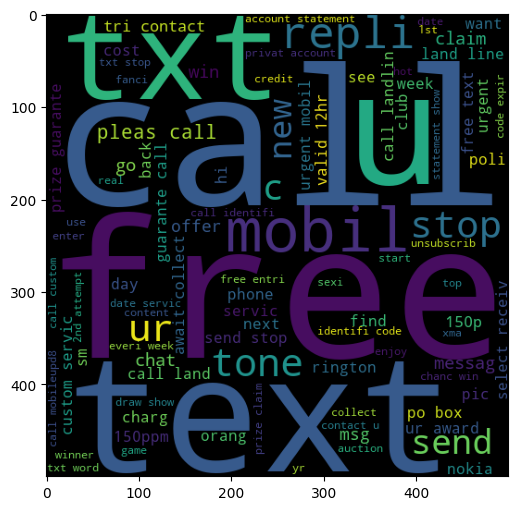

In [19]:
#--- WRITE YOUR CODE FOR TASK 3 ---
#spam = ...
spam = df[df['target'] == 1]
spam_text = ' '.join(spam['transformed_text'])


#--- Inspect data ---

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(spam['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)
plt.show()


> Task 4: Identifying Frequent Spam Keywords.

In [20]:
# from collections import Counter

#--- WRITE YOUR CODE FOR TASK 4 ---
#count = ...
from collections import Counter

spam = df[df['target'] == 1]

spam_text = ' '.join(spam['transformed_text'])

spam_words = nltk.word_tokenize(spam_text)


word_counts = Counter(spam_words)


count = word_counts.most_common(30)

count

#--- Inspect data ---

[('call', 311),
 ('free', 184),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('prize', 78),
 ('4', 75),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 49),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

# Module 4

> Task 1: Transforming Text into Machine-Ready Features.

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(max_features=3000)

#--- WRITE YOUR CODE FOR TASK 1 ---
#x, y = ...
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

x = tfidf.fit_transform(df['transformed_text']).toarray()

y = df['target']

#--- Inspect data ---

> Task 2: Splitting Data for Model Training and Evaluation.

In [22]:
from sklearn.model_selection import train_test_split

#--- WRITE YOUR CODE FOR TASK 2 ---
#x_train, x_test, y_train, y_test = ...

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#--- Inspect data ---


> Task 3: Evaluating Naive Bayes Model Precision and Accuracy.

In [23]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, precision_score

#--- WRITE YOUR CODE FOR TASK 3 ---
#accuracy1, precision1 = ...
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_preds = gnb.predict(x_test)
accuracy1 = round(accuracy_score(y_test, y_preds), 3)
precision1 = round(precision_score(y_test, y_preds), 3)

accuracy1, precision1
#--- Inspect data ---


(0.862, 0.468)

> Task 4: Evaluating Multinomial Naive Bayes Model.

In [24]:
# from sklearn.naive_bayes import MultinomialNB

#--- WRITE YOUR CODE FOR TASK 4 ---
#accuracy2, precision2 = ...
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

mnb = MultinomialNB()

mnb.fit(x_train, y_train)

y_preds = mnb.predict(x_test)

accuracy2 = round(accuracy_score(y_test, y_preds), 3)
precision2 = round(precision_score(y_test, y_preds), 3)

accuracy2, precision2
#--- Inspect data ---

(0.972, 1.0)

> Task 5: Assessing Bernoulli Naive Bayes Model Performance.

In [25]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

bnb = BernoulliNB()

bnb.fit(x_train, y_train)
y_preds = bnb.predict(x_test)

accuracy3 = round(accuracy_score(y_test, y_preds), 3)
precision3 = round(precision_score(y_test, y_preds), 3)


accuracy3, precision3


(0.983, 0.982)

# Module 5

> Task 1: Model Comparison for Spam Classification.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

# Initialize classifiers
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

# Create a dictionary of classifiers
clfs = {
    'NB': mnb,
    'KN': knc,
    'SVC': svc,
    'LR': lrc,
    'DT': dtc
}

# Initialize lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Loop through each classifier
for name, clf in clfs.items():
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Generate predictions on the test set
    y_preds = clf.predict(x_test)
    
    # Calculate accuracy and precision scores
    accuracy = round(accuracy_score(y_test, y_preds), 3)
    precision = round(precision_score(y_test, y_preds), 3)
    
    # Append scores to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

# Output or return accuracy_scores and precision_scores as needed
accuracy_scores, precision_scores


([0.972, 0.913, 0.977, 0.959, 0.937], [1.0, 1.0, 0.981, 0.938, 0.83])

> Task 2: Model Performance Summary.

In [27]:

df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})


df_sorted = df.sort_values(by='Precision', ascending=False).reset_index(drop=True)

df_sorted


,Algorithm,Accuracy,Precision
0,NB,0.972,1.000
1,KN,0.913,1.000
2,SVC,0.977,0.981
3,LR,0.959,0.938
4,DT,0.937,0.830


# Module 6

> Task 1: Enhancing Model Comparison Insights.

In [28]:
import pandas as pd

# Create temp_df with accuracy and precision scores for max features = 3000
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

# Sort temp_df based on 'Precision_max_ft_3000' column in descending order
temp_df_sorted = temp_df.sort_values(by='Precision_max_ft_3000', ascending=False).reset_index(drop=True)

# Merge df and temp_df on 'Algorithm' column to create new_df
new_df = pd.merge(df, temp_df_sorted, on='Algorithm', how='outer')

# Display the resulting new_df
new_df


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,DT,0.937,0.830,0.937,0.830
1,KN,0.913,1.000,0.913,1.000
2,LR,0.959,0.938,0.959,0.938
3,NB,0.972,1.000,0.972,1.000
4,SVC,0.977,0.981,0.977,0.981


> Task 2: Expanding Model Evaluation with Scaling.

In [29]:


temp_df_scaled = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_scaling': accuracy_scores,  
    'Precision_scaling': precision_scores 
})


temp_df_scaled_sorted = temp_df_scaled.sort_values(by='Precision_scaling', ascending=False).reset_index(drop=True)

new_df_scaled = pd.merge(new_df, temp_df_scaled_sorted, on='Algorithm', how='outer')
new_df_scaled
#--- Inspect data ---


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,DT,0.937,0.830,0.937,0.830,0.937,0.830
1,KN,0.913,1.000,0.913,1.000,0.913,1.000
2,LR,0.959,0.938,0.959,0.938,0.959,0.938
3,NB,0.972,1.000,0.972,1.000,0.972,1.000
4,SVC,0.977,0.981,0.977,0.981,0.977,0.981


> Task 3: Enriching Model Assessment with Text Features.

In [30]:
import pandas as pd


temp_df_num_chars = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_num_chars': accuracy_scores,  
    'Precision_num_chars': precision_scores 
})

temp_df_num_chars_sorted = temp_df_num_chars.sort_values(by='Precision_num_chars', ascending=False).reset_index(drop=True)


res = pd.merge(new_df_scaled, temp_df_num_chars_sorted, on='Algorithm', how='outer')

res

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,DT,0.937,0.830,0.937,0.830,0.937,0.830,0.937,0.830
1,KN,0.913,1.000,0.913,1.000,0.913,1.000,0.913,1.000
2,LR,0.959,0.938,0.959,0.938,0.959,0.938,0.959,0.938
3,NB,0.972,1.000,0.972,1.000,0.972,1.000,0.972,1.000
4,SVC,0.977,0.981,0.977,0.981,0.977,0.981,0.977,0.981
